<a href="https://colab.research.google.com/github/ivonnics/Machine-Learning/blob/master/MLP_CREDITCARD_Analysis_with_artificial_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Tomado de: https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6

          0         1         2         3  ...        27        28        29  Class
0  0.757620  0.731101  0.671391  0.475466  ...  0.067678  0.128623  0.884622      0
1  0.395493  0.308390  0.081089  0.169289  ...  0.651350  0.835160  0.606091      0
2  0.786004  0.839933  0.286307  0.046164  ...  0.777082  0.274647  0.292808      0
3  0.027103  0.152644  0.737956  0.061253  ...  0.207675  0.767671  0.110665      0
4  0.718662  0.255511  0.619199  0.820465  ...  0.529514  0.629353  0.991918      0

[5 rows x 31 columns]


(array([199598.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    402.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

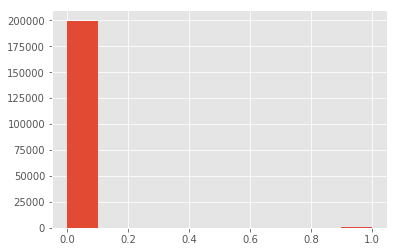

In [36]:
# Create artificial data:
df=pd.DataFrame(np.random.rand(200000, 30))
df['Class'] = np.random.choice([0, 1], size=(len(df)), p=[.998, .002])
print(df.head())
plt.hist(df['Class'])

In [37]:
df.isnull().any().sum()

0

In [38]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('frauds :',x*100,'%')
print('non frauds :',y*100,'%')

frauds : 0.201 %
non frauds : 99.799 %


Text(0, 0.5, 'Frequency')

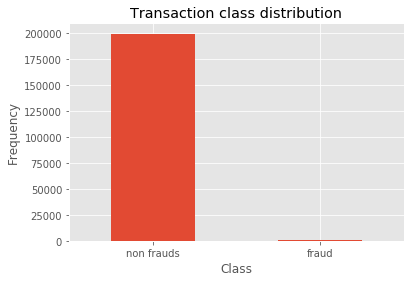

In [39]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")


In [0]:
# distribution of Amount
#amount = [df['Amount'].values]
#sns.distplot(amount)

In [0]:
# distribution of Time
#time = df['Time'].values
#sns.distplot(time)

In [68]:
# distribution of anomalous features
import matplotlib.gridspec as gridspec
anomalous_features = df.iloc[:,0:30].columns
print(anomalous_features)

anomalous_features2 = df.iloc[:,0:30]
print(anomalous_features2.shape)
print(anomalous_features2.head())



Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype='object')
(200000, 30)
         0         1         2   ...        27        28        29
0  0.757620  0.731101  0.671391  ...  0.067678  0.128623  0.884622
1  0.395493  0.308390  0.081089  ...  0.651350  0.835160  0.606091
2  0.786004  0.839933  0.286307  ...  0.777082  0.274647  0.292808
3  0.027103  0.152644  0.737956  ...  0.207675  0.767671  0.110665
4  0.718662  0.255511  0.619199  ...  0.529514  0.629353  0.991918

[5 rows x 30 columns]


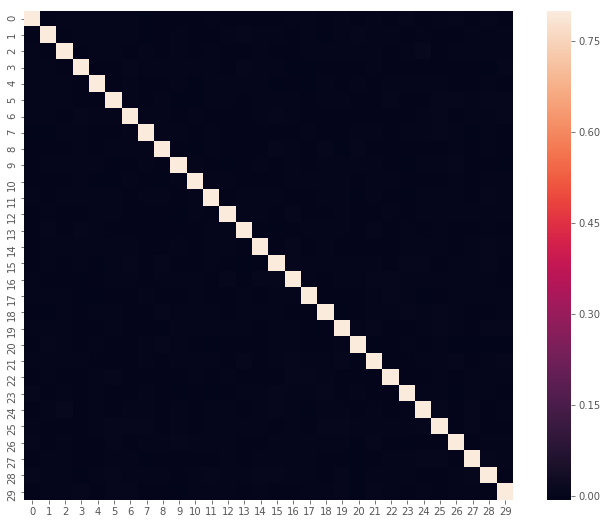

In [69]:
# heat map of correlation of features
correlation_matrix = anomalous_features2.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [70]:
from sklearn.cluster import KMeans

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(anomalous_features2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
print("Cluster memberships:\n{}".format(kmeans.labels_[0:28]))

Cluster memberships:
[1 2 2 0 0 2 2 0 0 0 2 1 2 0 0 0 1 1 2 1 2 2 2 1 1 0 2 1]


In [72]:
print(kmeans.predict(anomalous_features2[0:28]))

[1 2 2 0 0 2 2 0 0 0 2 1 2 0 0 0 1 1 2 1 2 2 2 1 1 0 2 1]


In [73]:
km = KMeans(n_clusters=3, 
            init= 'k-means++', 
            n_init=20, 
            max_iter=2000,
            tol=1e-03,
            random_state=0)
y_km = km.fit_predict(anomalous_features2)
print(y_km[0:28] )



[2 2 0 2 0 2 2 1 1 0 0 0 0 2 0 0 0 1 2 2 1 2 0 0 1 0 2 0]


In [0]:
# Standardizing the features
#df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
#df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

#df = df.drop(['Time','Amount'], axis = 1)
#print(df.shape)
#df.head()

In [0]:
#! pip install mglearn

### Best MLP Parameters: 
'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'


In [0]:
#import mglearn
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_moons

X = df.drop(['Class'], axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.05,
                                                    random_state=42)

mlp = MLPClassifier(solver='adam',activation= 'tanh', alpha= 0.0001,hidden_layer_sizes= (100,),learning_rate= 'adaptive',random_state=0).fit(X_train, y_train)


In [0]:
 Testing= mlp.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=Testing)
print(confmat)

[[9980    0]
 [  20    0]]


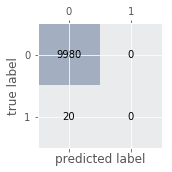

In [97]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

In [98]:
from sklearn.metrics import classification_report
y_pred = Testing
y_true = y_test
print('accuracy_score = ',accuracy_score(y_true, y_pred)*100,'%')
print('Total accurate predictions = ',accuracy_score(y_true, y_pred, normalize=False))
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

accuracy_score =  99.8 %
Total accurate predictions =  9980
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      9980
     class 1       0.00      0.00      0.00        20

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[9980    0]
 [  20    0]]


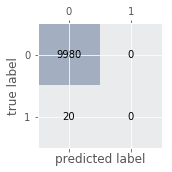

accuracy_score =  99.8 %
Total accurate predictions =  9980
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      9980
     class 1       0.00      0.00      0.00        20

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh',hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
Testing= mlp.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=Testing)
print(confmat)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')

plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()
y_pred = Testing
y_true = y_test
print('accuracy_score = ',accuracy_score(y_true, y_pred)*100,'%')
print('Total accurate predictions = ',accuracy_score(y_true, y_pred, normalize=False))
target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))


## Metrics used to evaluate models in Scikit learn: 
https://towardsdatascience.com/understanding-data-science-classification-metrics-in-scikit-learn-in-python-3bc336865019

accuracy_score:

In [100]:
accuracy_score(y_true, y_pred)
# Accuracy is the fraction of samples predicted correctly

0.998

In [101]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)
# Recall (also known as sensitivity) is the fraction of positives events that were predicted correctly

0.0

In [102]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)
# Precision is the fraction of predicted positives events that are actually positive 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [103]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)
# The f1 score is the harmonic mean of recall and precision, with a higher score as a better model

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [0]:
from sklearn.metrics import roc_curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_true, y_pred)
# ROC curves are VERY help with understanding the balance between true-positive
# rate and false positive rates. Sci-kit learn has built in functions for ROC curves
# and for analyzing them. The inputs to these functions (roc_curve and roc_auc_score)
# are the actual labels and the predicted probabilities (not the predicted labels).
# Both roc_curve and roc_auc_score are both complicated functions, they are used
# TO COMPARE MODELS` PERFORMANcE (see article)

In [105]:
thresholds_RF

array([1, 0])

In [106]:
fpr_RF

array([0., 1.])

In [107]:
tpr_RF

array([0., 1.])

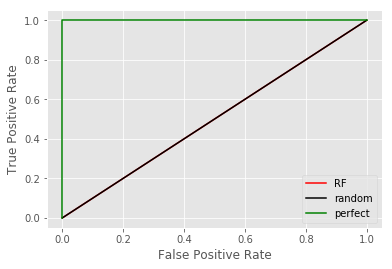

In [108]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [109]:
from sklearn.metrics import roc_auc_score
auc_RF = roc_auc_score(y_true, y_pred)
print('AUC RF:%.3f'% auc_RF)

AUC RF:0.500


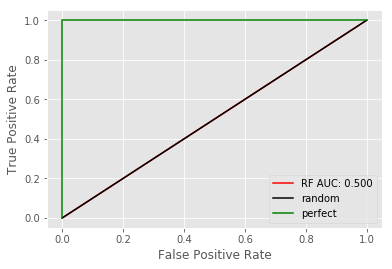

In [110]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Adjusting the hyperparameters of MLP classifier to get more perfect performance:

https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa

https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/

In [0]:
# GridSearch fine tuning tomado de: 
# https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))    

In [0]:
print('accuracy_score = ',accuracy_score(y_true, y_pred)*100,'%')
print('Total accurate predictions = ',accuracy_score(y_true, y_pred, normalize=False))
target_names = ['class 0', 'class 1']

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()